# Exploración y preprocesado de los datos con pH

In [ ]:
import pandas as pd
datos_ph= pd.read_excel("SOCIB_CANALES-BGQ-DATABASE_REVISED_TOTAL_TFM.xlsx")
datos_ph.head()

,TRANSECT,STATION,BOTTLE,LAT,LONG,DATE,TIME,Sal00,Sal11,DepSM,...,O2DIFF,Spar,Par,CStarAt0,FlSP,SeaTurbMtr,Scan,pH+correc CRM+0.0047,pH Accuracy,pH Precision
0,RADMED,2,5,39.452667,2.316833,2023-02-20 00:00:00,09:10:07,37.9458,37.9530,22.858,...,-0.0454,5.666800e+13,7.571300,0.1739,0.613890,0.177,6042,7.962403,0.034,0.0034
1,RADMED,2,1,39.452667,2.316833,2023-02-20 00:00:00,09:10:07,38.3876,38.3958,89.859,...,-0.0229,1.751800e+13,0.120810,0.0715,0.045003,0.137,3290,7.877465,0.034,0.0034
2,RADMED,3,5,39.413667,2.234667,2023-02-20 00:00:00,09:43:37,37.9173,37.9246,24.221,...,-0.0326,6.596200e+13,9.048000,0.1725,0.460190,0.178,6657,7.961601,0.034,0.0034
3,RADMED,3,1,39.413667,2.234667,2023-02-20 00:00:00,09:43:37,38.3340,38.3449,109.224,...,-0.0389,6.462400e+13,0.037264,0.0680,0.063392,0.108,3782,7.885594,0.034,0.0034
4,RADMED,4,5,39.366833,2.149667,2023-02-20 00:00:00,10:20:50,38.0027,38.0136,24.059,...,-0.0537,6.841900e+13,10.430000,0.1746,0.853410,0.197,7380,7.958617,0.034,0.0034


In [ ]:
datos_ph['DATE'] = pd.to_datetime(datos_ph['DATE'], errors='coerce')

In [ ]:
print(datos_ph.columns.tolist())

['TRANSECT', 'STATION', 'BOTTLE', 'LAT', 'LONG', 'DATE', 'TIME', 'Sal00', 'Sal11', 'DepSM', 'PrDM', 'T090C', 'T190C', 'T2-T190C', 'C0mS/cm', 'C1mS/cm', 'C2-C1mS/cm', 'Sal00.1', 'Sal11.1', 'SecS-priS', 'Density00', 'Density11', 'D2-D1,d', 'Sbeox0Mg/L', 'Sbeox1Mg/LSbeox0Mg/Ldiff', 'O2DIFF', 'Spar', 'Par', 'CStarAt0', 'FlSP', 'SeaTurbMtr', 'Scan', 'pH+correc CRM+0.0047', 'pH Accuracy', 'pH Precision']


# Filtrado de columnas

In [ ]:
datos_ph = datos_ph.drop(columns = ['CStarAt0','Sal11', 'Sal00.1','Sal11.1','T2-T190C', 'T190C', 'C1mS/cm', 'C2-C1mS/cm', 'BOTTLE', 'TIME', 'SecS-priS', 'TRANSECT', 'STATION','Density00', 'Density11',  'D2-D1,d', 'Sbeox1Mg/LSbeox0Mg/Ldiff', 'O2DIFF','Scan' ])

In [ ]:
print(datos_ph.columns.tolist())

['LAT', 'LONG', 'DATE', 'Sal00', 'DepSM', 'PrDM', 'T090C', 'C0mS/cm', 'Sbeox0Mg/L', 'Spar', 'Par', 'FlSP', 'SeaTurbMtr', 'pH+correc CRM+0.0047', 'pH Accuracy', 'pH Precision']


# Eliminación de valores faltantes de pH

In [ ]:
datos_ph = datos_ph.rename(columns={'pH+correc CRM+0.0047': 'pH'})
#datos_ph = datos_ph.dropna(subset=["pH", "pH Accuracy", "pH Precision"])
datos_ph = datos_ph.dropna(subset=["pH"])
print("\nValores nulos:")
print(datos_ph.isnull().sum())


Valores nulos:
LAT             0
LONG            0
DATE            0
Sal00           0
DepSM           0
PrDM            0
T090C           0
C0mS/cm         0
Sbeox0Mg/L      0
Spar            0
Par             0
FlSP            0
SeaTurbMtr      0
pH              0
pH Accuracy     0
pH Precision    0
dtype: int64


In [ ]:
print("\nTipos de datos:")
print(datos_ph.dtypes)

print("\nValores nulos:")
print(datos_ph.isnull().sum())


Tipos de datos:
LAT                    float64
LONG                   float64
DATE            datetime64[ns]
Sal00                  float64
DepSM                  float64
PrDM                   float64
T090C                  float64
C0mS/cm                float64
Sbeox0Mg/L             float64
Spar                   float64
Par                    float64
FlSP                   float64
SeaTurbMtr             float64
pH                     float64
pH Accuracy            float64
pH Precision           float64
dtype: object

Valores nulos:
LAT             0
LONG            0
DATE            0
Sal00           0
DepSM           0
PrDM            0
T090C           0
C0mS/cm         0
Sbeox0Mg/L      0
Spar            0
Par             0
FlSP            0
SeaTurbMtr      0
pH              0
pH Accuracy     0
pH Precision    0
dtype: int64


# Eliminación de valores outliers

In [ ]:
import numpy as np

# Eliminar valores anormalmene bajos y altos
datos_ph = datos_ph[((datos_ph['pH'] > 7.85) & (datos_ph['pH'] < 8.0)) | (datos_ph['pH'].isna())]

# Eliminar las campañas recientes debido a sus valores anómalos
datos_ph.loc[datos_ph['DATE'] >= '01/01/2025', ['pH', 'pH Accuracy','pH Precision']] = np.nan


# Visualizacion de los datos

In [ ]:
print(datos_ph.describe())

              LAT        LONG                           DATE       Sal00  \
count  323.000000  323.000000                            323  323.000000   
mean    39.131487    1.327195  2024-02-25 21:19:30.278637824   38.226181   
min     38.981500    0.146500            2023-02-20 00:00:00   36.032400   
25%     38.999833    0.736500            2023-11-07 00:00:00   38.094550   
50%     39.002167    1.195833            2024-02-06 00:00:00   38.396900   
75%     39.276833    1.976500            2024-07-15 12:00:00   38.550700   
max     39.500667    2.399667            2025-05-20 00:00:00   38.639200   
std      0.152951    0.678551                            NaN    0.459371   

            DepSM        PrDM       T090C     C0mS/cm  Sbeox0Mg/L  \
count  323.000000  323.000000  323.000000  323.000000  323.000000   
mean   249.491601  251.715248   14.659038   46.184820    6.436244   
min      3.622000    3.650000   13.121200   45.001455    2.906200   
25%     24.404000   24.592000   13.6364

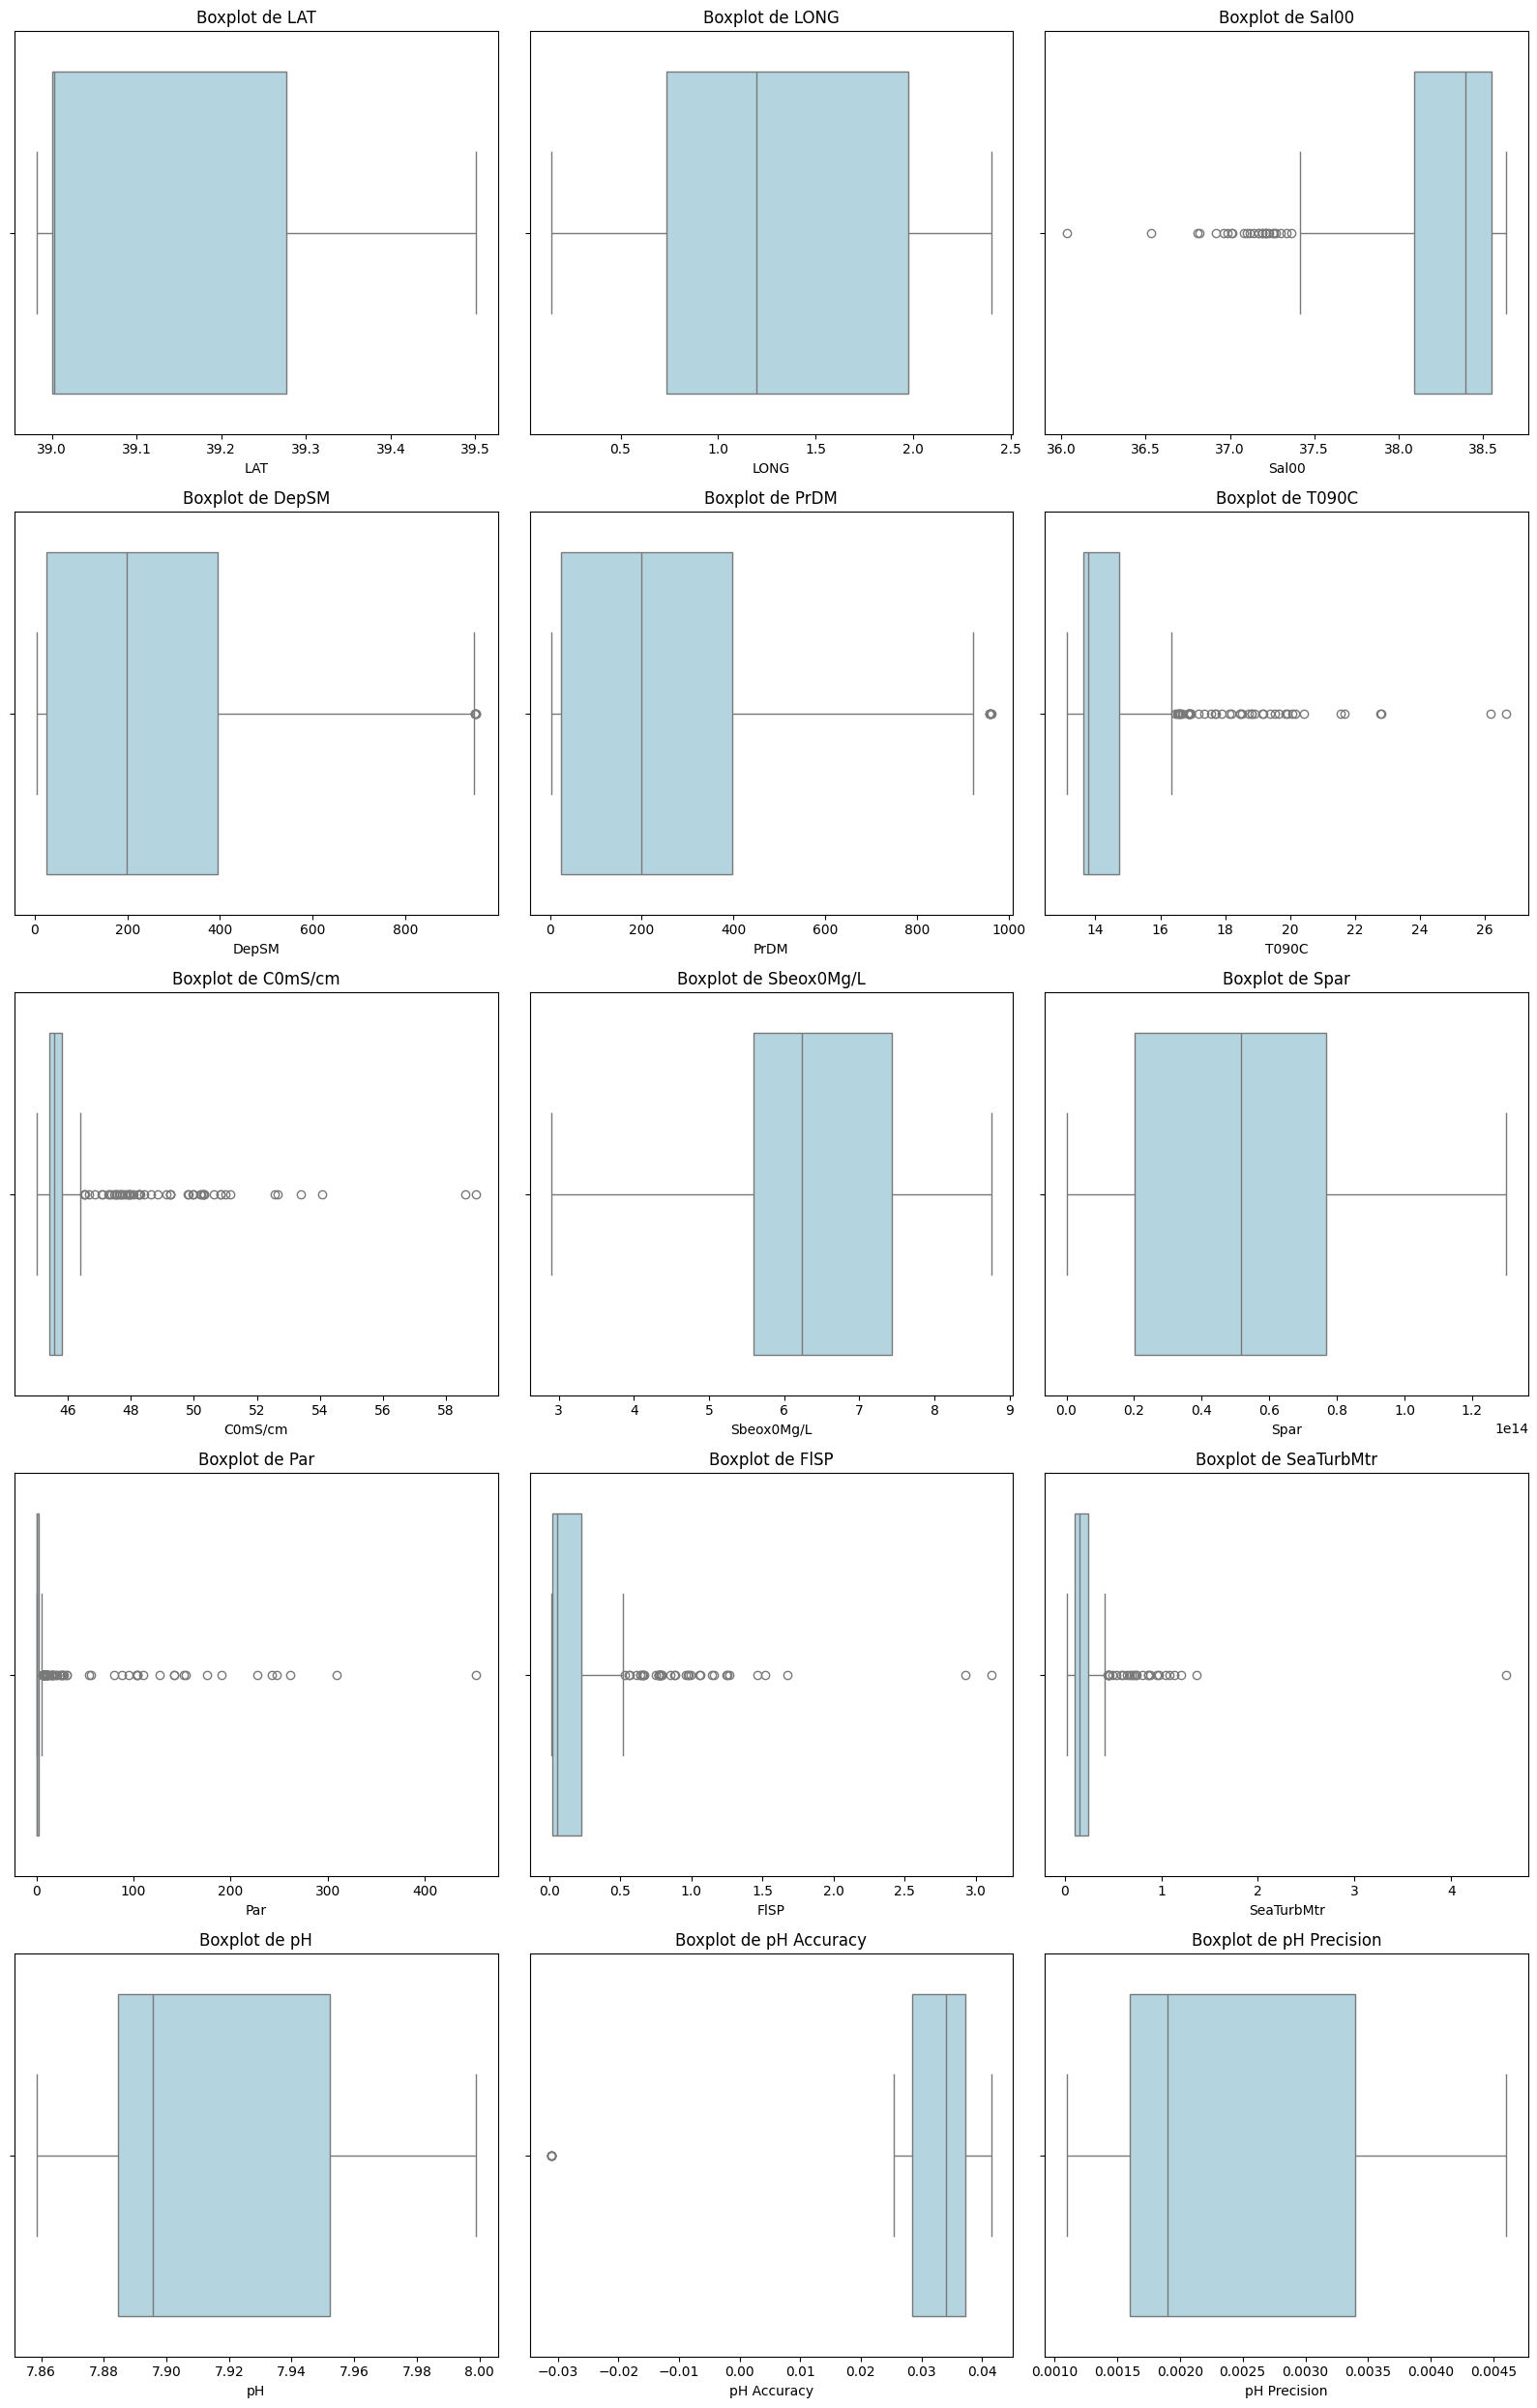

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# seleccionar variables numéricas
columnas_numericas = datos_ph.select_dtypes(include=["float64", "int64"]).columns

n_cols = 3
n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 5 * n_rows))

for i, col in enumerate(columnas_numericas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=datos_ph, x=col, color='lightblue')
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()


In [ ]:
renombrar_columnas = {
    'LAT': 'LAT',
    'LONG': 'LON',
    'DATE': 'DATE',
    'Sal00': 'SALT',
    'DepSM': 'DEPTH',
    'PrDM': 'WTR_PRE',
    'T090C': 'WTR_TEM_01',
    'C0mS/cm': 'COND',
    'Sbeox0Mg/L': 'OXI_CON',
    'Par Radiación Fotosinteticamente Activa)': 'SDPAR',
    'FlSP': 'CHLO',
    'SeaTurbMtr': 'TURB'

}

datos_ph.rename(columns=renombrar_columnas, inplace=True)

# Visualizacion evolucion pH

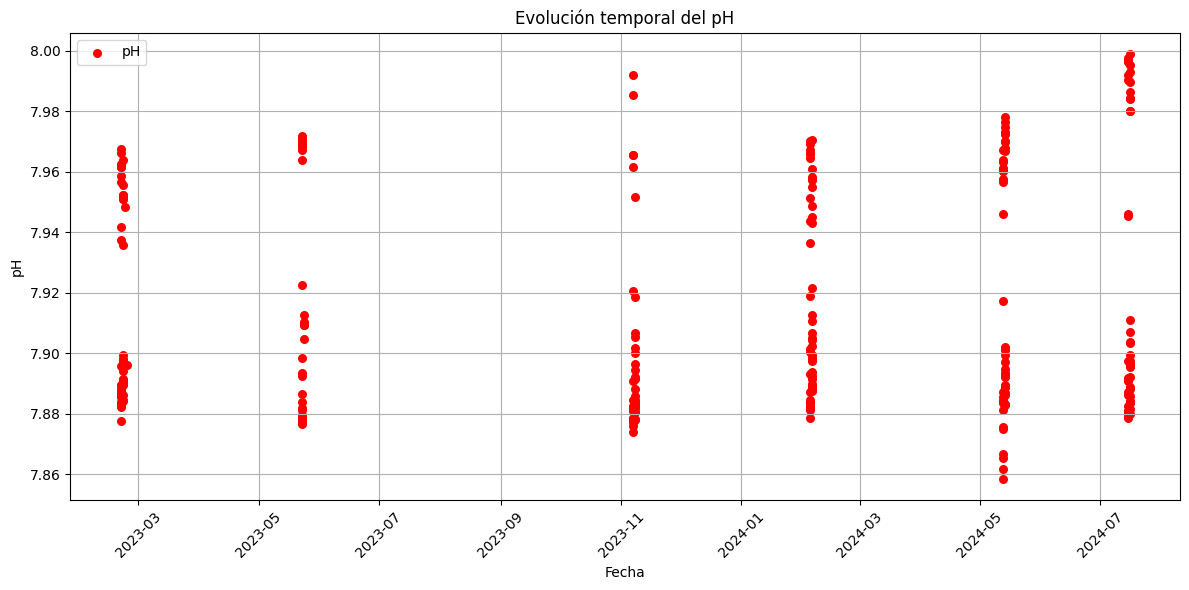

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.scatter(datos_ph['DATE'], datos_ph['pH'], color='r', s=30, label='pH')
plt.title('Evolución temporal del pH')
plt.xlabel('Fecha')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Correlaciones entre variables

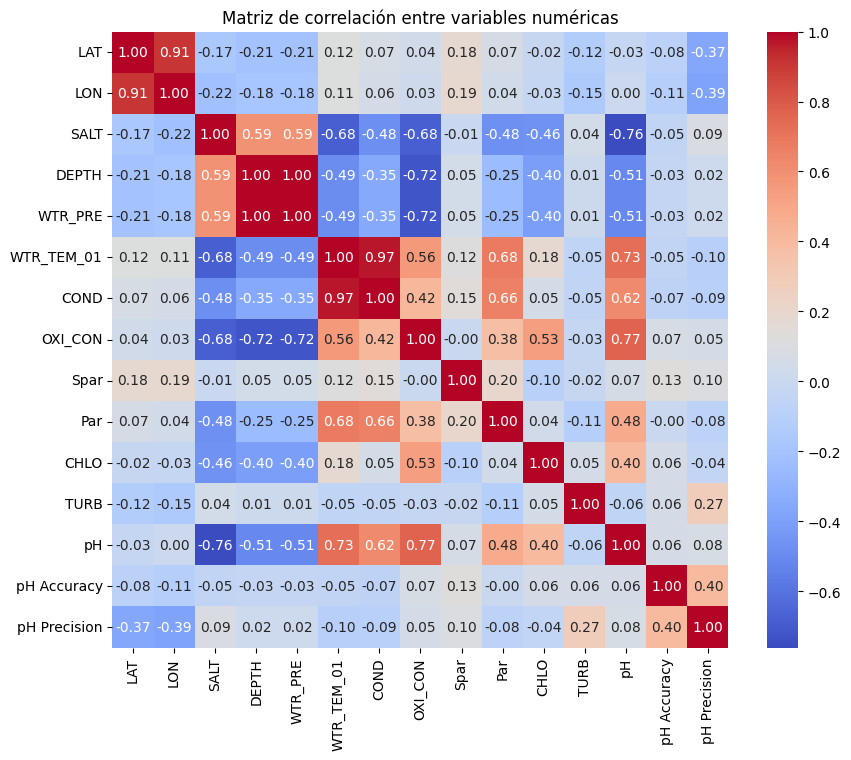

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datos_numericos = datos_ph.select_dtypes(include='number')

#  matriz de correlación
matriz_correlacion = datos_numericos.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [ ]:
datos_ph.to_csv("datos_con_ph_11_09_25.csv", index=False)